싼 주유소 찾기

In [18]:
#필요한 모듈 불러오기
import time
import pandas as pd 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

1. 셀레늄으로 서울시 구별 주유소 가격정보 얻기

In [19]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver=webdriver.Chrome() #크롬드라이버 연결
driver.get(url)

In [20]:
#팝업메뉴 '싼 주유소 찾기' 클릭
driver.find_element(By.CSS_SELECTOR,'.ic_m1').click()

In [21]:
#서울 자치구 리스트 불러오기
metro=driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')
metro.send_keys('서울')
time.sleep(1) #검색이 될동안 잠깐 쉬기

In [22]:
#시/군/구 리스트 불러오기
sigungu=driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
gu_list=sigungu.find_elements(By.CSS_SELECTOR,'option') #option태그 선택. 'By.TAG_NAME'도 가능

In [23]:
gu_list

[<selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_163")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_165")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_169")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_171")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_173")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027e

In [24]:
gu_list[0] #리스트를 객체로 가져옴
#gu_list[0].text: 값 확인

<selenium.webdriver.remote.webelement.WebElement (session="1d932b9ed0d2a03479027efd160316a3", element="839B2EAE4226E8F11DDEE9869392FC91_element_163")>

In [25]:
#가져온 구 옵션을 리스트로 만들기
gu_name = []
for gu in gu_list: #gu_list에 있는 각 요소에 대해 반복
    #print(gu.text) 현재 요소의 텍스트를 출력
    gu_name.append(gu.text) #현재 요소에서 추출한 텍스트를 gu_name리스트에 추가

#gu_name=[gu.text for gu in gu_list]를 동작해도 됨
#gu: 반복문을 통해 리스트나 요소를 순회하면서 각 요소에 접근하기 위한 임시 변수

In [26]:
del gu_name[0] #리스트의 첫번째값(시/군/구) 지우기
print(gu_name)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [27]:
#엑셀 저장버튼
driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]/span').click()

In [30]:
#25개 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_name:
    sigungu=driver.find_element(By.XPATH,'//*[@id="SIGUNGU_NM0"]')
    time.sleep(2) #네트워크환경, 컴퓨터 성능 고려해서 지정
    sigungu.send_keys(gu) #구를 하나씩 선택
    time.sleep(2)

    driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

2. 구별 휘발유 가격에 대한 데이터 분석

In [32]:
from glob import glob
#파일들의 목록을 반환. 일반적으로 와일드카드(*)를 사용하여 특정 파일 경로를 찾거나 특정 패턴에 일치하는 파일들을 검색하는데 사용. 내장이라 별도의 설치 필요없음

In [33]:
#25개 파일을 하나로 합치기
glob('C:/Users/tjoeun/Downloads/지역*.xls') #다운로드 절대경로에서 '지역'으로 시작하는 파일 리스트 뽑기

['C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/tjoeun/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/tjoeu

In [34]:
#xls파일 불러올 수 있는 모듈 설치
! pip install xlrd

In [35]:
df_list=[]
for file in glob('C:/Users/tjoeun/Downloads/지역*.xls'):
    #파일 이름이 '지역'으로 시작하고 '.xls' 확장자를 가진 모든 파일 검색
    gs=pd.read_excel(file, header=2) #엑셀파일에서 데이터를 읽을 때 2번째 행을 헤더로 사용. 실제 데이터가 있는 위치를 반영
    df_list.append(gs)

In [36]:
df_list

[       지역                    상호                            주소        상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  HD현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  HD현대오일뱅크   
 2   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)     SK에너지   
 3   서울특별시           (주)소모 신월주유소        서울 강동구 양재대로 1323 (성내동)     GS칼텍스   
 4   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)     GS칼텍스   
 5   서울특별시                 명일주유소          서울 강동구 고덕로 168 (명일동)     SK에너지   
 6   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168     GS칼텍스   
 7   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)     SK에너지   
 8   서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)     GS칼텍스   
 9   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)     S-OIL   
 10  서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)     GS칼텍스   
 11  서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)     SK에너지   
 12  서울특별시  

In [37]:
df=pd.read_excel(file, header=2) #합친 파일 저장

In [38]:
df=pd.concat(df_list) #df_list에 있는 여러개의 DataFrame을 하나로 합침
#pd.concat(): 여러 개의 DataFrame이 위아래로 연결
df.shape #(행의 수, 열의 수)형태로 반환

(438, 10)

In [39]:
df.head() #없는 정보들이 꽤 있는 '고급휘발유', '실내등유'컬럼 빼기

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1589,1529,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1634,1545,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1665,1575,1500
3,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1896,1676,1608,1590
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1885,1685,1615,1599


In [40]:
#필요한 컬럼만 뽑기. 컬럼명을 리스트로 나열
df=df[['상호','주소','휘발유','셀프여부','상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1676,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1685,Y,GS칼텍스


In [42]:
#컬럼명 바꾸기(보기 쉽고 간단하게)
df.rename(columns={'휘발유':'가격','셀프여부':'셀프'}, inplace=True)
df.head()

#inplace=True 설정 시 DataFrame이 직접 수정됨. 새로운 DataFrame객체를 반환하지 않음

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1589,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1634,N,HD현대오일뱅크
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1665,Y,SK에너지
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1676,Y,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1685,Y,GS칼텍스


In [43]:
df.set_index('상호', inplace=True) #'상호' 열을 인덱스로 설정. 사본 없이 원래 ataFrame에 즉시 적용

In [48]:
df['구'] = df.주소.apply(lambda x: x.split()[1])
#'주소'열에서 각 행의 주소를 공백을 기준으로 분할 -> 분할된 결과에서 두번째 단어(공백으로 분할된 리스트의 인덱스 1에 해당하는 값)를 추출하여 '구'라는 새로운 열을 생성

In [49]:
#구 뽑기
df.구.unique() #'구'열에 있는 고유한 값들을 배열로 출력

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [50]:
df.info() #데이터타입 확인. 가격 타입이 int인지

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 재건에너지 재정제2주유소 고속셀프지점 to (주)만정에너지 삼보주유소
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      438 non-null    object
 1   가격      438 non-null    int64 
 2   셀프      438 non-null    object
 3   상표      438 non-null    object
 4   구       438 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.5+ KB


In [51]:
#잘 만들었는지 확인 후 저장
df.to_csv('opinet_202312214.csv', index=False) #CSV파일로 데이터를 저장할 때 인덱스를 포함시키지 않도록

셀프주유소가 저렴한가?

In [53]:
import seaborn as sns #시각화 라이브러리 'Seaborn'
import matplotlib.pyplot as plt #시각화 라이브러리 'Matplotlib'
plt.rcParams['font.family']='Malgun Gothic' #한글을 표시하기 위해 설정
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 사용 시 깨지지 않고 정상적으로 출력되도록 설정

In [54]:
df.pivot_table('가격','셀프', aggfunc=['count','mean','min','max','std','var'])
#'가격'열을 기준으로 '셀프'열을 행으로 사용하여 피벗테이블 생성

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,167,1786.760479,1523,2598,253.940089,64485.56879
Y,271,1606.771218,1515,2178,68.513957,4694.16228


Text(0.5, 1.0, '셀프여부에 따른 가격 boxplot')

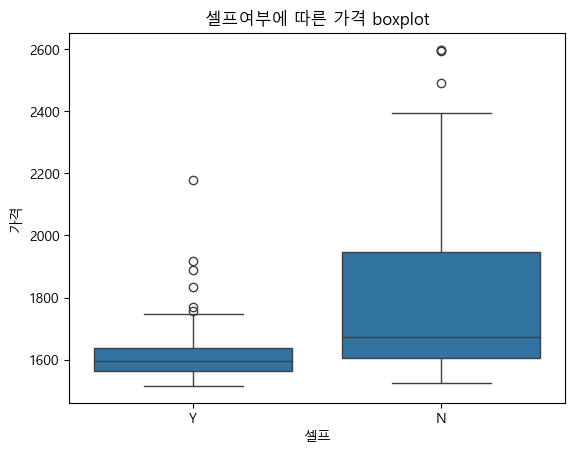

In [55]:
sns.boxplot(df,x='셀프',y='가격')
plt.title('셀프여부에 따른 가격 boxplot') #셀프주유소는 가격편차가 크지 않다는 걸 알 수 있음

구별 휘발유 가격 비교

In [56]:
df.pivot_table('가격','구').sort_values('가격', ascending=False) #내림차순. 용산구가 가장 비싸다는 걸 알 수 있음

,가격
구,
용산구,2137.500000
종로구,1945.111111
중구,1923.800000
강남구,1881.250000
성동구,1764.333333
강동구,1728.214286
서초구,1691.451613
영등포구,1677.555556
동작구,1659.222222


상표별 평균 가격

In [57]:
df.pivot_table('가격','상표').sort_values('가격', ascending=False) #GS칼텍스가 가장 비싸다는 걸 알 수 있음

,가격
상표,
GS칼텍스,1711.563107
SK에너지,1706.755906
HD현대오일뱅크,1646.301724
S-OIL,1638.784810
자가상표,1633.000000
알뜰주유소,1553.500000
알뜰(ex),1539.000000
